# Exploratory Data Analysis:

In this exploratory data analysis, I will inspect a dataframe constructed from a kaggle dataset on job postings for data science related professional roles in 2024 (https://www.kaggle.com/datasets/ritiksharma07/data-science-job-listings-from-glassdoor) and a BLS report generated for data scientists in 2023 (https://data.bls.gov/oes/#/occInd/One%20occupation%20for%20multiple%20industries).

The dataframe was constructed in another notebook linked here (https://github.com/gisthuband/Capstone_2_DS_Job_Locator/blob/main/data_wrangle.ipynb)


The dataframe will be used to construct a model that will take a salary range and self-perceived competitiveness in the job market, and use that to find the best cities and roles to apply to in the US.


The steps I will take to inspect this data is as follows:




1.) Visualize and get describe().isna() for different columns of dataset

2.) Check for correlations or patterns within the data with y-profiling

3.) Check statistics of jobs based on location

## Import

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## 1.) Visualizing/Summarizing Columns in DataFrame

In [29]:
df = pd.read_csv('wrangled_data_v2.csv')

In [30]:
df =df.drop(columns='Unnamed: 0')

In [31]:
df.head()

,upper_salary,lower_salary,state,city,Job Title,Company Rating,company_name,Employment(1),Annual mean wage(2),Annual median wage(2),total_new_post_rat,range_avg_to_mean_ratio,range_avg_to_median_ratio
0,84000.000000,57000.000000,WI,Onalaska,Associate Stop Loss Underwriter,2.7,The Insurance Center,3090.0,105250.0,101850.0,515.0,0.669834,0.692194
1,148165.491991,104355.331808,WI,Eau Claire,Marketing Advertising Analyst,3.0,"Net Health Shops, LLC",3090.0,105250.0,101850.0,515.0,1.199624,1.239670
2,160000.000000,135000.000000,WI,Madison,Manager - IT Infrastructure Engineering,3.9,UW Credit Union,3090.0,105250.0,101850.0,515.0,1.401425,1.448208
3,84000.000000,59000.000000,WI,Wausau,Associate Stop Loss Underwriter,2.7,The Insurance Center,3090.0,105250.0,101850.0,515.0,0.679335,0.702013
4,87000.000000,58000.000000,WI,New Berlin,Supply Chain Data Analyst (Day Shift) - New Be...,3.5,DB SCHENKER,3090.0,105250.0,101850.0,515.0,0.688836,0.711831


In [32]:
df.dtypes

upper_salary                 float64
lower_salary                 float64
state                         object
city                          object
Job Title                     object
Company Rating               float64
company_name                  object
Employment(1)                float64
Annual mean wage(2)          float64
Annual median wage(2)        float64
total_new_post_rat           float64
range_avg_to_mean_ratio      float64
range_avg_to_median_ratio    float64
dtype: object

In [33]:
df.isna().sum()

upper_salary                  0
lower_salary                  0
state                         0
city                          0
Job Title                     0
Company Rating               60
company_name                  0
Employment(1)                 0
Annual mean wage(2)           0
Annual median wage(2)         0
total_new_post_rat            0
range_avg_to_mean_ratio       0
range_avg_to_median_ratio     0
dtype: int64

In [34]:
df['upper_salary'].describe()

count       499.000000
mean     148165.491991
std       55369.177216
min       29120.000000
25%      110500.000000
50%      148165.491991
75%      175000.000000
max      357000.000000
Name: upper_salary, dtype: float64

Text(0.5, 1.0, 'Histogram of Upper Salary Posts')

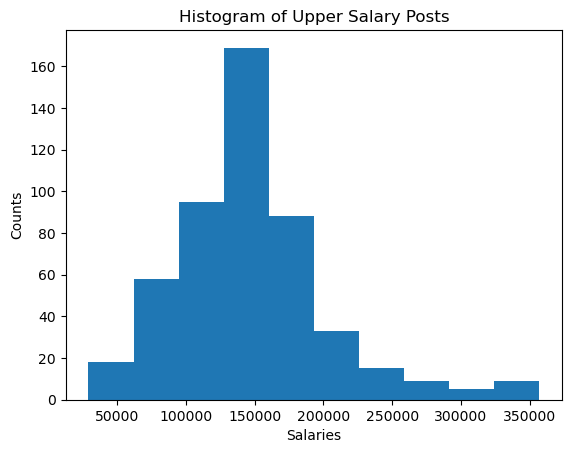

In [35]:
plt.hist(df['upper_salary'])
plt.xlabel('Salaries')
plt.ylabel('Counts')
plt.title('Histogram of Upper Salary Posts')

In [36]:
df['lower_salary'].describe()

count       499.000000
mean     104355.331808
std       36836.009231
min       29120.000000
25%       76000.000000
50%      104355.331808
75%      125000.000000
max      250000.000000
Name: lower_salary, dtype: float64

Text(0.5, 1.0, 'Histogram of Lower Salary Posts')

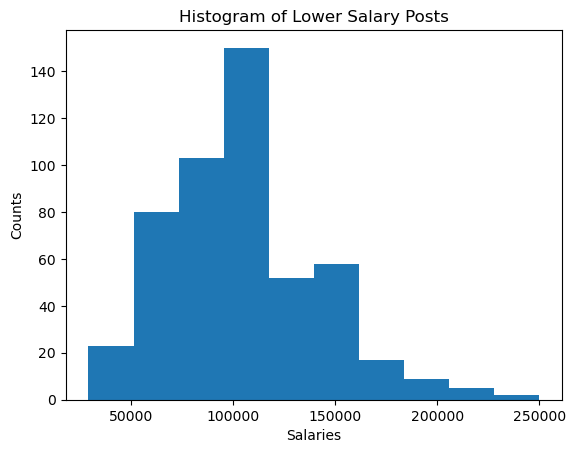

In [37]:
plt.hist(df['lower_salary'])
plt.xlabel('Salaries')
plt.ylabel('Counts')
plt.title('Histogram of Lower Salary Posts')

In [38]:
df = df.rename(columns={'Employment(1)':'tot_employment_in_state'})

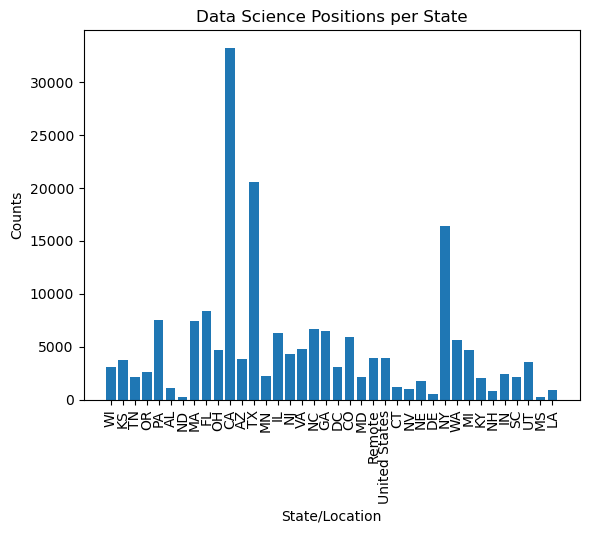

In [39]:
plt.bar(x =df['state'],height = df['tot_employment_in_state'])
plt.xlabel('State/Location')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Data Science Positions per State')
plt.show()

In [40]:
#df['Annual mean wage(2)'].unique()

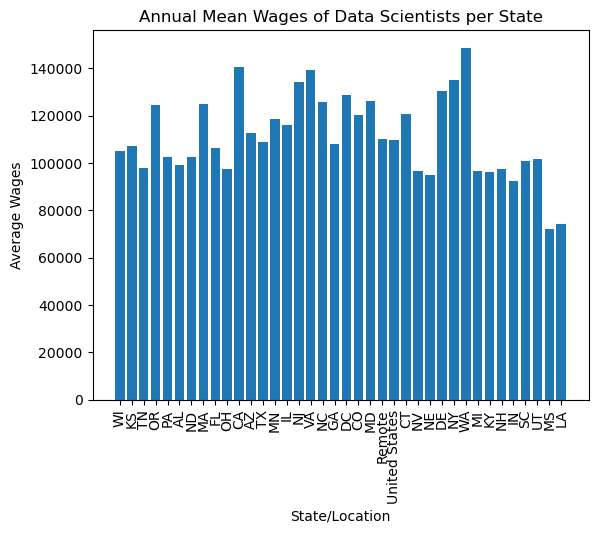

In [41]:
plt.bar(x=df['state'], height= df['Annual mean wage(2)'])
plt.xlabel('State/Location')
plt.xticks(rotation=90)
plt.ylabel('Average Wages')
plt.title('Annual Mean Wages of Data Scientists per State')
plt.show()

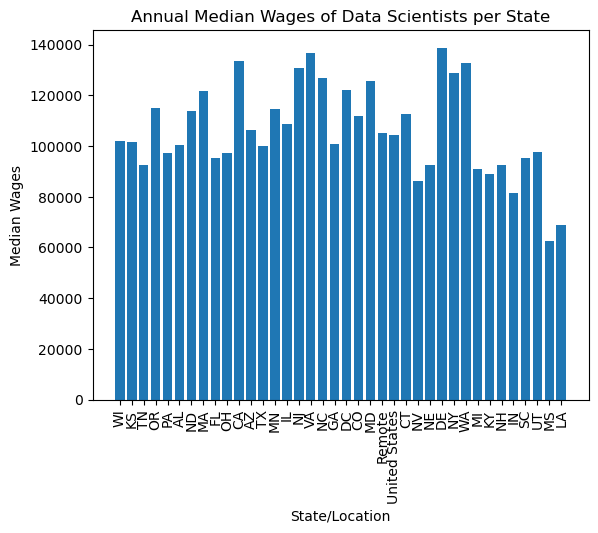

In [42]:
plt.bar(x=df['state'], height= df['Annual median wage(2)'])
plt.xlabel('State/Location')
plt.xticks(rotation=90)
plt.ylabel('Median Wages')
plt.title('Annual Median Wages of Data Scientists per State')
plt.show()

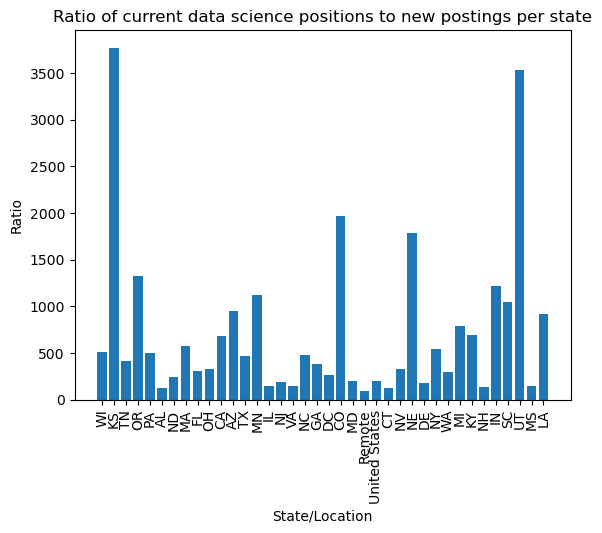

In [43]:
plt.bar(x=df['state'],height=df['total_new_post_rat'])
plt.xlabel('State/Location')
plt.xticks(rotation=90)
plt.ylabel('Ratio')
plt.title('Ratio of current data science positions to new postings per state')
plt.show()

The intention of this was to show if the job market was growing relatively quickly for the state (low ratio = high growth of jobs in the field relative to existing jobs)

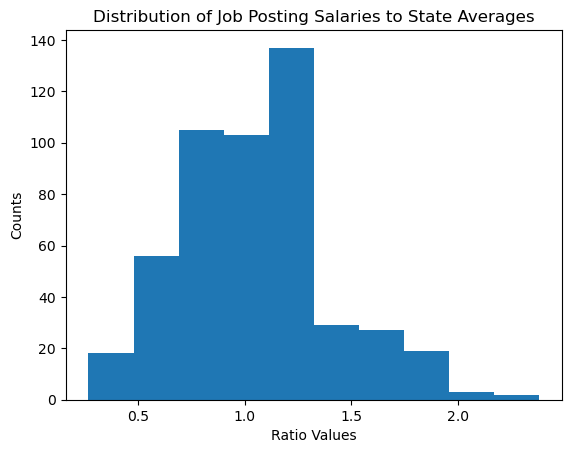

In [44]:
plt.hist(df['range_avg_to_mean_ratio'])
plt.xlabel('Ratio Values')
plt.ylabel('Counts')
plt.title('Distribution of Job Posting Salaries to State Averages')
plt.show()

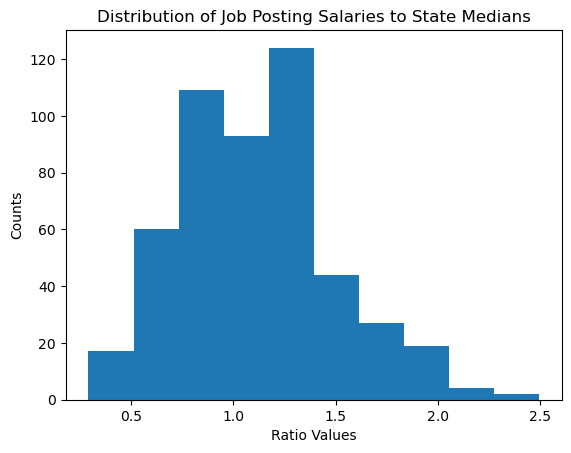

In [45]:
plt.hist(df['range_avg_to_median_ratio'])
plt.xlabel('Ratio Values')
plt.ylabel('Counts')
plt.title('Distribution of Job Posting Salaries to State Medians')
plt.show()

In [46]:
df['state'].value_counts(ascending=False)[:5]

state
CA        49
TX        44
IL        43
Remote    41
VA        34
Name: count, dtype: int64

In [47]:
df['city'].value_counts(ascending=False)[:5]

city
Remote           41
Riverwoods       31
New York         22
United States    20
McLean           16
Name: count, dtype: int64

In [48]:
df['Job Title'].value_counts()[:5]

Job Title
Data Scientist                 24
Senior Data Scientist          17
Senior Manager Data Science     8
Principal Data Science          8
Data Analyst                    7
Name: count, dtype: int64

In [49]:
df['Company Rating'].describe()

count    439.000000
mean       3.812301
std        0.480281
min        1.000000
25%        3.600000
50%        3.800000
75%        4.000000
max        5.000000
Name: Company Rating, dtype: float64

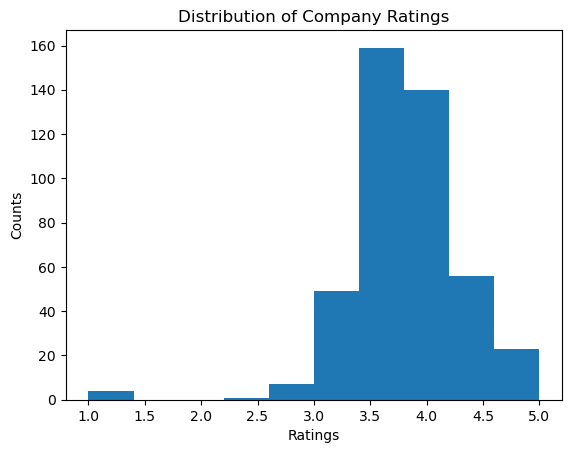

In [50]:
plt.hist(df['Company Rating'])
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Distribution of Company Ratings')
plt.show()

In [51]:
df['Company Rating'] = df['Company Rating'].fillna(np.mean(df['Company Rating']))

Seems that values around 3 are quite poor relative to the mean

In [52]:
df['company_name'].value_counts()[:10]

company_name
Discover Financial Services    31
Inizio Engage                  18
Freddie Mac                    12
NVIDIA                          9
Kforce                          7
Newark Board of Education       7
Mathematica Policy Research     7
Aquent                          7
Dropbox                         6
Capital One                     6
Name: count, dtype: int64

It seems that data scientists are in demand for big name finance companies

## 2.) Y-Profiling Data Analysis

In [26]:
import requests

import ydata_profiling
from ydata_profiling.utils.cache import cache_file
from pathlib import Path

In [53]:
report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False)
report

# Take aways from this ydata-profiling:

1.) Duplicates should be inspected and dropped

2.) This is data that most likely not set up to be a regression due to the lack of correlation

3.) It could make sense to make a classification model with all of the location data present

## Drop Duplicates

In [54]:
dup = []
dupped = df.duplicated()
for x in range(len(dupped)):
    if dupped[x] == True:
        dup.append(x)

In [55]:
df.loc[dup]

,upper_salary,lower_salary,state,city,Job Title,Company Rating,company_name,tot_employment_in_state,Annual mean wage(2),Annual median wage(2),total_new_post_rat,range_avg_to_mean_ratio,range_avg_to_median_ratio
22,182000.0,145000.0,PA,Malvern,"Head of Data Science & Machine Learning, Perso...",3.7,Vanguard,7490.0,102370.0,97260.0,499.333333,1.597148,1.681061
27,137000.0,103000.0,PA,Malvern,FinTech Data Scientist,3.7,Vanguard,7490.0,102370.0,97260.0,499.333333,1.172218,1.233806
33,41600.0,41600.0,AL,Selma,Field Data Collector (PPC),3.9,Mathematica Policy Research,1120.0,99040.0,100560.0,124.444444,0.420032,0.413683
34,137000.0,85000.0,AL,Huntsville,Data Scientist,3.8,"CODE Plus, Inc.",1120.0,99040.0,100560.0,124.444444,1.120759,1.103819
35,137000.0,85000.0,AL,Huntsville,Data Scientist,3.8,"CODE Plus, Inc.",1120.0,99040.0,100560.0,124.444444,1.120759,1.103819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,168000.0,109000.0,NH,Nashua,Product Management Leader- AI,4.1,Optimizely,780.0,97330.0,92670.0,130.000000,1.422994,1.494551
488,168000.0,109000.0,NH,Nashua,Product Management Leader- AI,4.1,Optimizely,780.0,97330.0,92670.0,130.000000,1.422994,1.494551
490,120000.0,75000.0,NH,Concord,Data Scientist,4.2,Alexander Technology Group,780.0,97330.0,92670.0,130.000000,1.001747,1.052120
494,143520.0,104000.0,SC,Greenville,Data Scientist 192840,4.0,HKA Enterprises,2090.0,100790.0,95310.0,1045.000000,1.227900,1.298500


In [56]:
df = df.drop_duplicates(keep='last')

In [57]:
df_corr = df.drop(columns=['city','state','Job Title','Company Rating', 'company_name'])

Even though the y-data profiling has a correlation section, it was column by column in many little plots.  Lets use a heatmap to create a correlation plot.

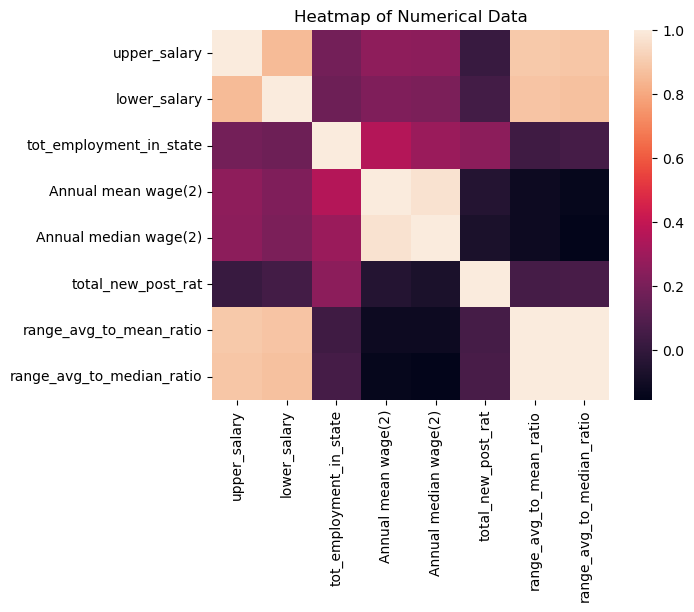

In [58]:
sns.heatmap(df_corr.corr())
plt.title('Heatmap of Numerical Data')
plt.savefig('heatmap.png')
plt.show()


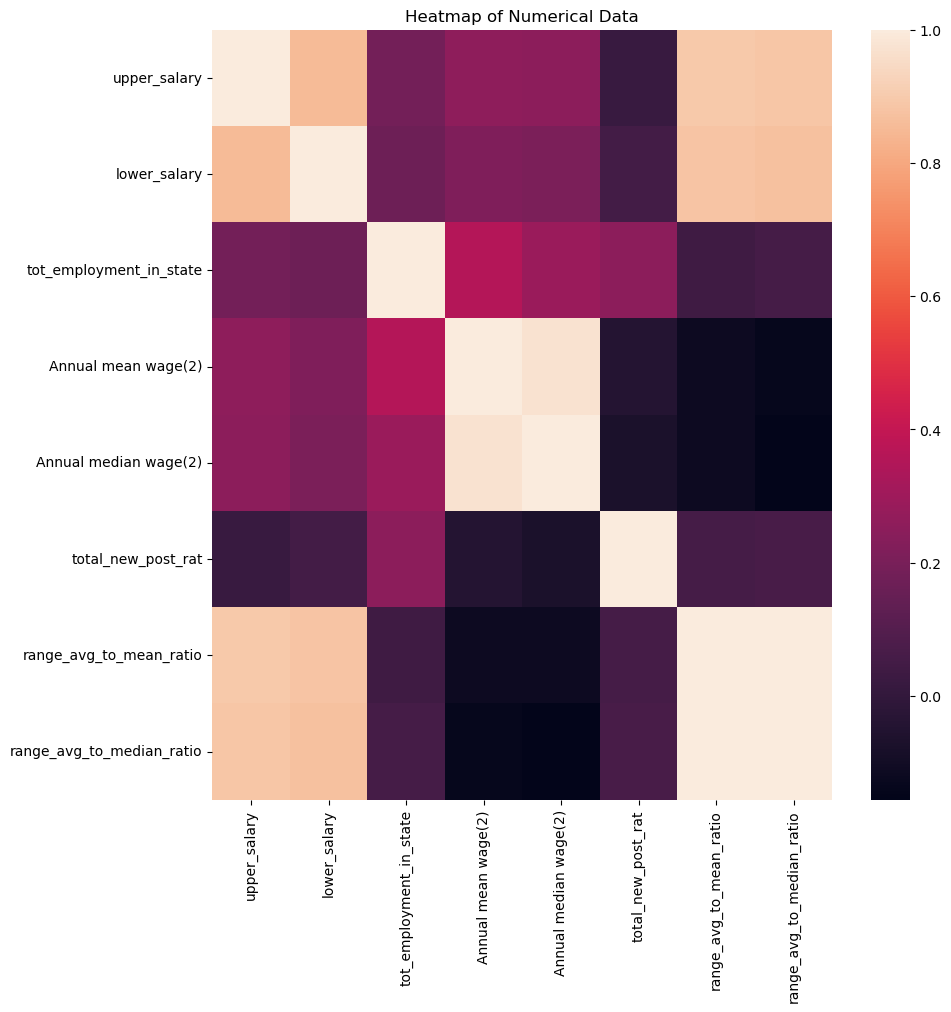

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr.corr(), ax=ax)
ax.set(title='Heatmap of Numerical Data')
plt.savefig("heatmap.png")
plt.show()

It seems that upper and lower salaries correspone with the ratio created from them, so that is obvious.  However, there seems to be a half correlation with total employment of data scientists in the state and annual mean and median wages, the machine learning model may pick that up.  Lets visualize this variable against the others to see though.

In [60]:
def employment_plotter(df_col1, df_col2):
    
    plt.scatter(x=df_col1, y=df_col2)
    plt.xlabel('Total number of data science jobs in the state')
    plt.ylabel('Wage Statistic')
    plt.title('Number of data science jobs per state vs wages per state')

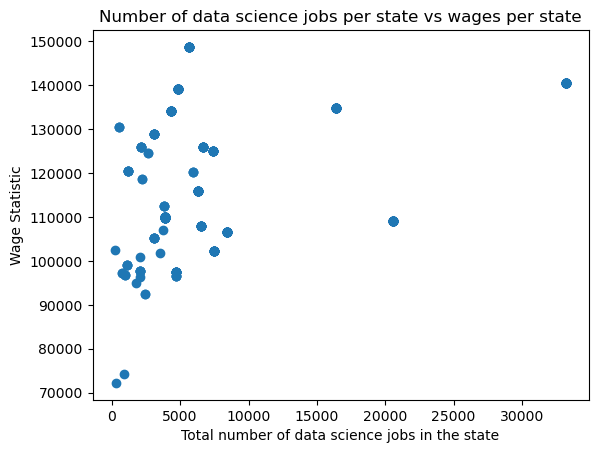

In [61]:
mean = employment_plotter(df['tot_employment_in_state'],df['Annual mean wage(2)'])

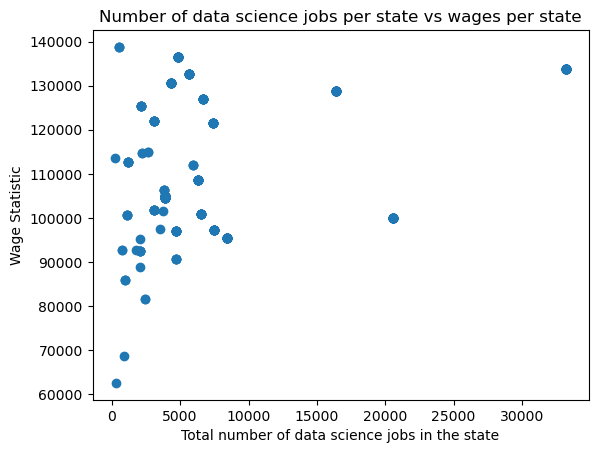

In [62]:
median = employment_plotter(df['tot_employment_in_state'],df['Annual median wage(2)'])

California, Texas, and New York seem to be outliers, lets see if we can find a stronger correlation with those points removed

In [63]:
cue = ['CA','TX', 'NY']
features = [x for x in df['state'] if x not in cue]
df_wo = df[df['state'].isin(features)]

In [64]:
df_wo = df_wo.drop(columns=['city','state','Job Title','Company Rating', 'company_name'])

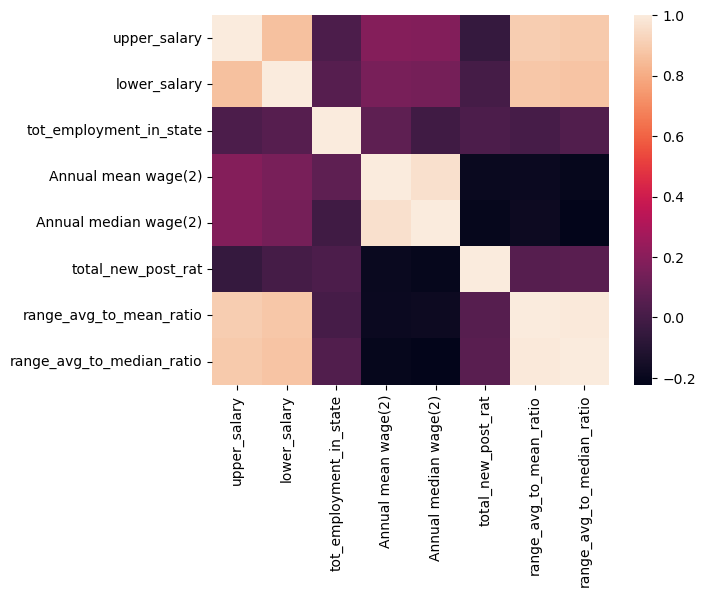

In [65]:
sns.heatmap(df_wo.corr())
plt.show()

Seems that those outliers are quite important in establishing the semi correlation

## 3.) Examine data through the lens of cities/states/regions to see if there are any noticeable features

In [66]:
cit_ser = df['city'].value_counts(ascending=False)[:15]

In [67]:
top_cit_list = [x for x in cit_ser.index]


In [68]:
upper_top_df = df[df['city'].isin(top_cit_list)]

In [69]:
upper_top_df.head()

,upper_salary,lower_salary,state,city,Job Title,Company Rating,company_name,tot_employment_in_state,Annual mean wage(2),Annual median wage(2),total_new_post_rat,range_avg_to_mean_ratio,range_avg_to_median_ratio
41,200000.0,153000.0,MA,Boston,Sr. Digital Signal Processing Engineer,3.812301,Cherish Health,7400.0,125100.0,121560.0,569.230769,1.410871,1.451958
42,105000.0,100000.0,MA,Boston,Data Scientist,3.800000,Commonwealth Health Insurance Connector Authority,7400.0,125100.0,121560.0,569.230769,0.819345,0.843205
43,200000.0,140000.0,MA,Boston,Sr. Data Science Engineer,3.812301,Cherish Health,7400.0,125100.0,121560.0,569.230769,1.358913,1.398486
48,247000.0,141000.0,MA,Boston,"Director I, Data Science",3.700000,Liberty Mutual,7400.0,125100.0,121560.0,569.230769,1.550759,1.595920
51,160000.0,106000.0,MA,Boston,Knowledge Analyst - (Gen) AI and Digital Trans...,4.200000,Boston Consulting Group,7400.0,125100.0,121560.0,569.230769,1.063149,1.094110


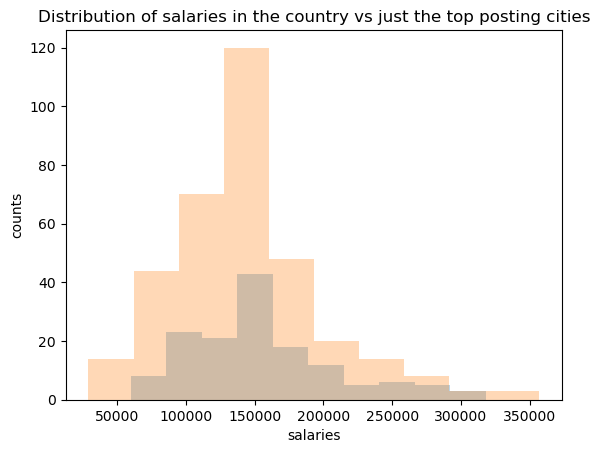

In [70]:
plt.hist(upper_top_df['upper_salary'], alpha = 0.3)
plt.hist(df['upper_salary'], alpha = 0.3)
plt.xlabel('salaries')
plt.ylabel('counts')
plt.title('Distribution of salaries in the country vs just the top posting cities')
plt.show()

Although both of the distributions are Gaussian, you can see that the top posting cities contain nearly all of the very high salaries

Lets check the top posting cities ratios to the state averages

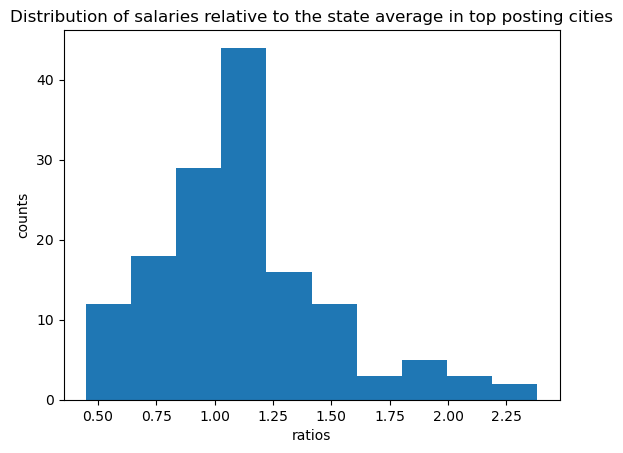

In [71]:
plt.hist(upper_top_df['range_avg_to_mean_ratio'])
plt.xlabel('ratios')
plt.ylabel('counts')
plt.title('Distribution of salaries relative to the state average in top posting cities')
plt.show()

It seems that the salary ratios on average above 1, and sometimes very high

In [72]:
upper_top_df['range_avg_to_mean_ratio'].groupby(upper_top_df['city']).mean().sort_values(ascending=False)[:20]

city
New York         1.241084
Boston           1.240608
Remote           1.227659
Austin           1.202490
Irving           1.165101
United States    1.159548
Riverwoods       1.159234
Washington       1.133220
McLean           1.097397
Atlanta          1.080951
Seattle          0.943186
Charlotte        0.874570
Reston           0.842141
Chicago          0.770115
Newark           0.701579
Name: range_avg_to_mean_ratio, dtype: float64

In [73]:
df['range_avg_to_mean_ratio'].groupby(df['city']).mean().sort_values(ascending=False)[:20]

city
Santa Clara     1.877951
Lafayette       1.762411
Ann Arbor       1.761658
Battle Creek    1.523316
Linthicum       1.507697
Glendale        1.459179
Offutt A F B    1.458509
Tampa           1.446145
Chandler        1.444830
Sandy           1.429554
Nashua          1.422994
Madison         1.401425
Sacramento      1.391700
Cleveland       1.386240
Malvern         1.384683
Alpharetta      1.353270
Dedham          1.302958
Rocky River     1.294580
Dayton          1.294580
Independence    1.294580
Name: range_avg_to_mean_ratio, dtype: float64

Just because there are the most postings in one city does not indicate that those postings are going to be on average paying more than the states average.

In [74]:
#df.head()

Lets try preemptively turning this into a classfication problem and dividing jobs based on sections of the country:
east, midwest, south, west

In [75]:
west = ['WA','ID','MT','WY','NV','OR','CA','UT','CO','AK','HI']
south = ['WV','NM','AZ','TX','LA','MS','AL','GA','FL','OK','AR','KY','TN','VA','MD','DC','NC','SC','DE']
midwest = ['ND','SD','NE','MO','WI','IA','KS','MI','IL','IN','OH','MN']
east = ['PA','NY','NJ','RI','NH','VT','ME','MA','CT']

print (len(west)+len(south)+len(midwest)+len(east))

51


In [76]:
labels= []
for x in df['state']:
    if x in west:
        labels.append('west')
    elif x in south:
        labels.append('south')
    elif x in midwest:
        labels.append('midwest')
    elif x in east:
        labels.append('east')
    else:
        labels.append('remote')

In [77]:
df['labels'] = labels

In [78]:
df.head(15)

,upper_salary,lower_salary,state,city,Job Title,Company Rating,company_name,tot_employment_in_state,Annual mean wage(2),Annual median wage(2),total_new_post_rat,range_avg_to_mean_ratio,range_avg_to_median_ratio,labels
0,84000.000000,57000.000000,WI,Onalaska,Associate Stop Loss Underwriter,2.700000,The Insurance Center,3090.000000,105250.0,101850.0,515.000000,0.669834,0.692194,midwest
1,148165.491991,104355.331808,WI,Eau Claire,Marketing Advertising Analyst,3.000000,"Net Health Shops, LLC",3090.000000,105250.0,101850.0,515.000000,1.199624,1.239670,midwest
2,160000.000000,135000.000000,WI,Madison,Manager - IT Infrastructure Engineering,3.900000,UW Credit Union,3090.000000,105250.0,101850.0,515.000000,1.401425,1.448208,midwest
3,84000.000000,59000.000000,WI,Wausau,Associate Stop Loss Underwriter,2.700000,The Insurance Center,3090.000000,105250.0,101850.0,515.000000,0.679335,0.702013,midwest
4,87000.000000,58000.000000,WI,New Berlin,Supply Chain Data Analyst (Day Shift) - New Be...,3.500000,DB SCHENKER,3090.000000,105250.0,101850.0,515.000000,0.688836,0.711831,midwest
5,100000.000000,100000.000000,WI,Milwaukee,Senior Data Scientist - Reinforcement Learning...,3.900000,Northwestern Mutual,3090.000000,105250.0,101850.0,515.000000,0.950119,0.981836,midwest
6,157000.000000,106000.000000,KS,Wichita,Manager of Data Science,3.400000,"Nuvative, Inc.",3771.764706,107000.0,101610.0,3771.764706,1.228972,1.294164,midwest
7,141000.000000,105000.000000,TN,Nashville,Senior Data Product Manager,4.200000,ProviderTrust,2090.000000,97710.0,92400.0,418.000000,1.258827,1.331169,south
8,148165.491991,104355.331808,TN,Memphis,Marketing Analyst,3.812301,"Redwood Services, LLC.",2090.000000,97710.0,92400.0,418.000000,1.292195,1.366455,south
9,155000.000000,86000.000000,TN,Memphis,Computational Engineer (Level II or Senior),4.500000,St. Jude Children's Research Hospital,2090.000000,97710.0,92400.0,418.000000,1.233241,1.304113,south


In [79]:
df['upper_salary'].groupby(df['labels']).mean()

labels
east       146372.679888
midwest    127109.964635
remote     154972.408238
south      137337.650294
west       162720.672489
Name: upper_salary, dtype: float64

In [80]:
up_ser = df['upper_salary'].groupby(df['labels'])
up_ser = pd.Series(up_ser)
up_list = []
for x in up_ser:
    temp_list = []
    for y in x[1]:
        if type(y) != str:
            temp_list.append(y)
    up_list.append(temp_list)
print (up_list)

[[148000.0, 148165.49199084667, 46000.0, 111000.0, 95000.0, 100000.0, 182000.0, 117000.0, 78000.0, 148165.49199084667, 98000.0, 137000.0, 130000.0, 175000.0, 104000.0, 200000.0, 105000.0, 200000.0, 157000.0, 247000.0, 129000.0, 158000.0, 160000.0, 166000.0, 190000.0, 131000.0, 89000.0, 148165.49199084667, 107000.0, 60000.0, 191000.0, 148165.49199084667, 175000.0, 186000.0, 151000.0, 132000.0, 107000.0, 107000.0, 107000.0, 107000.0, 199000.0, 107000.0, 196000.0, 77000.0, 148165.49199084667, 130000.0, 80000.0, 148165.49199084667, 47840.0, 135000.0, 150000.0, 85000.0, 240000.0, 153000.0, 156000.0, 240000.0, 165000.0, 90000.0, 260000.0, 185000.0, 165000.0, 234000.0, 140000.0, 65000.0, 165000.0, 91000.0, 134000.0, 270000.0, 250000.0, 269000.0, 168000.0, 120000.0], [84000.0, 148165.49199084667, 160000.0, 84000.0, 87000.0, 100000.0, 157000.0, 80000.0, 148165.49199084667, 148165.49199084667, 135000.0, 148165.49199084667, 148165.49199084667, 81120.0, 104000.0, 177000.0, 76960.0, 145600.0, 15000

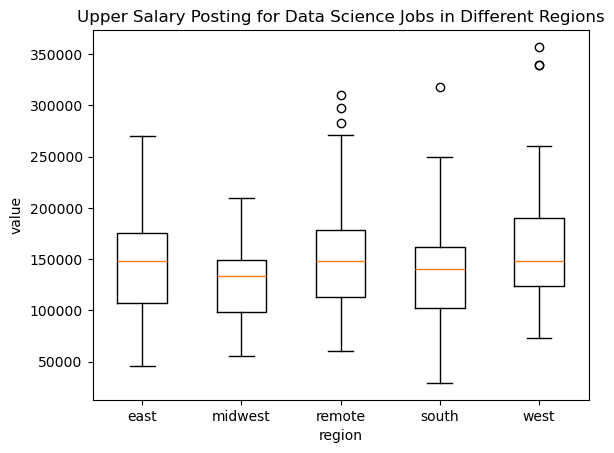

In [81]:
plt.boxplot(labels=['east','midwest','remote','south','west'], x=up_list)
plt.xlabel('region')
plt.ylabel('value')
plt.title('Upper Salary Posting for Data Science Jobs in Different Regions')
plt.savefig('diff_region_upper.png')
plt.show()

In [82]:
df['lower_salary'].groupby(df['labels']).mean()

labels
east       105366.277651
midwest     93261.075515
remote     110826.972998
south       96256.237561
west       113060.652874
Name: lower_salary, dtype: float64

In [83]:
df['Annual mean wage(2)'].groupby(df['labels']).mean()

labels
east       125198.194444
midwest    106568.409091
remote     109959.406536
south      117056.976744
west       137154.693878
Name: Annual mean wage(2), dtype: float64

In [84]:
un_mean = df['Annual mean wage(2)'].groupby(df['labels']).unique()
avg_list = []
for x in un_mean:
    temp_list =[]
    for y in x:
        temp_list.append(y)
    avg_list.append(temp_list)

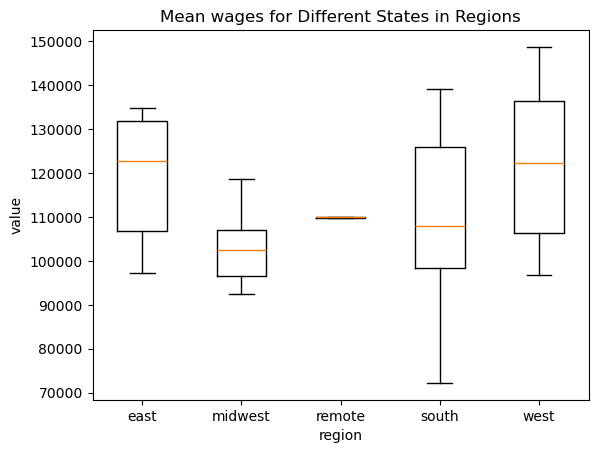

In [85]:
plt.boxplot(labels=['east','midwest','remote','south','west'], x=avg_list)
plt.xlabel('region')
plt.ylabel('value')
plt.title('Mean wages for Different States in Regions')
plt.savefig('diff_region_avg_upper.png')
plt.show()

In [86]:
df['tot_employment_in_state'].groupby(df['labels']).sum()

labels
east       6.231100e+05
midwest    2.065318e+05
remote     1.960245e+05
south      1.083560e+06
west       1.027320e+06
Name: tot_employment_in_state, dtype: float64

In [87]:
ser = df['tot_employment_in_state'].groupby(df['labels']).unique()

In [88]:
heights = []
for x in ser:
    sum_ = 0
    for y in x:
        sum_ = y + sum_
    heights.append(sum_)
print (heights)

[37590.0, 29241.764705882353, 7842.254336567385, 63020.0, 51920.0]


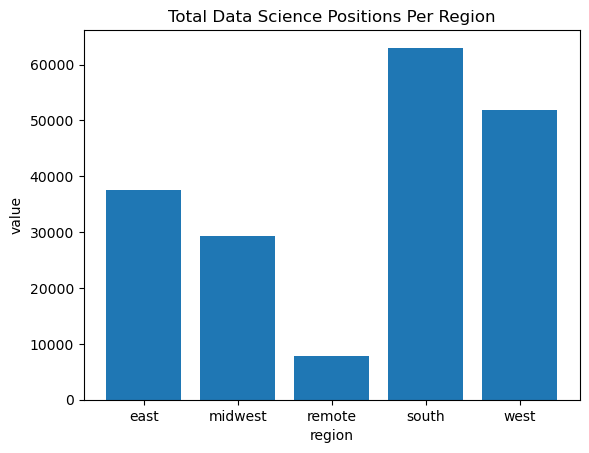

In [89]:
plt.bar(x=['east','midwest','remote','south','west'], height=heights)
plt.xlabel('region')
plt.ylabel('value')
plt.title('Total Data Science Positions Per Region')
plt.savefig('tot_pos_region.png')
plt.show()

with an inverse transformation, now the distribution is more gaussian, and inverted, so a smaller value will now mean that the state has a more competitive entry into the field, and the larger values will now mean that the state has an easier entry into the job market

As a user, the perceived competitiveness will have 1 subtracted from it, and the difference will be multplied by the std of the this distribution, and this number will be subtracted from the median

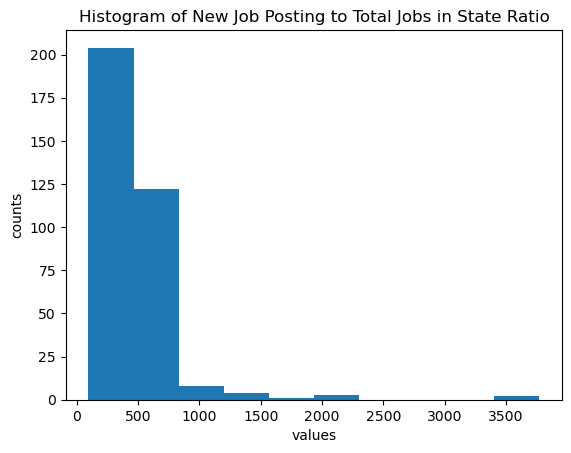

In [90]:
plt.hist(df['total_new_post_rat'])
plt.xlabel('values')
plt.ylabel('counts')
plt.title('Histogram of New Job Posting to Total Jobs in State Ratio')
plt.show()


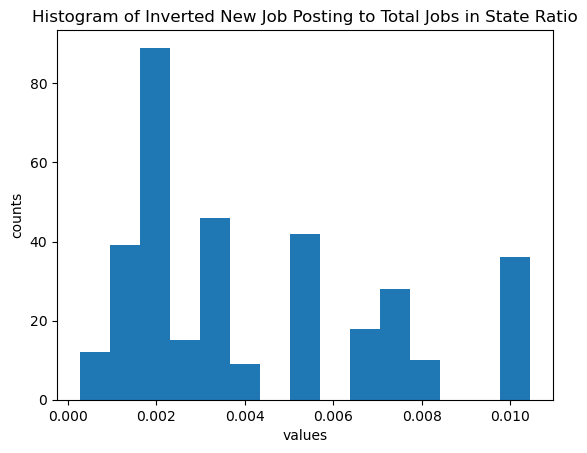

In [91]:
new_ser = 1/df['total_new_post_rat']
plt.hist(new_ser, bins=15)
plt.xlabel('values')
plt.ylabel('counts')
plt.title('Histogram of Inverted New Job Posting to Total Jobs in State Ratio')
plt.show()

df = df.drop(columns='total_new_post_rat')
df = pd.concat([df,new_ser], axis=1)

It seems that the section classification will most likely work well with the models

In [92]:
df.to_csv('explored_data_v1.csv')

# In Summary:

There is an approximate Gaussian distribution in the following observed columns: upper_salary, lower_salary, company rating, wages to state mean ratios, and wages to state median ratios.  This indicates that the jobs were most likely sampled well and less likely to confuse and mis fit a classification model.

The y-data profiling in tandem with heatmap study showed that there is little numerical correlation that will be useful, which would have been paramount if this was a regression question.  However, this illuminates the necessity to make this model a classification model.

After organizing the jobs into several regions (west, midwest, east, south, and remote), I was able to quickly show that aggregate functions of the groupings provide distinct numerical groups and will most likely be digested well by a classification model.

